In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
X,y = make_classification(1000,100,n_informative=3 ,n_classes=3,random_state=1234)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)
Arbol=DecisionTreeClassifier(criterion="entropy")

In [6]:
Arbol.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [7]:
Arbol.score(X_train,y_train)

1.0

In [8]:
Arbol.score(X_test,y_test)

0.8066666666666666

In [14]:
Arbol.tree_.max_depth

10

In [15]:
Arbol2=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [16]:
Arbol2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [17]:
Arbol2.score(X_train,y_train)

0.9085714285714286

In [18]:
Arbol2.score(X_test,y_test)

0.7833333333333333

In [19]:
### Grafico
train_pred=[]
test_pred=[]
max_depth=list(range(2,30))

for i in max_depth:
    arbol3=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    arbol3.fit(X_train,y_train)
    train_pred.append(arbol3.score(X_train,y_train))
    
    test_pred.append(arbol3.score(X_test,y_test))

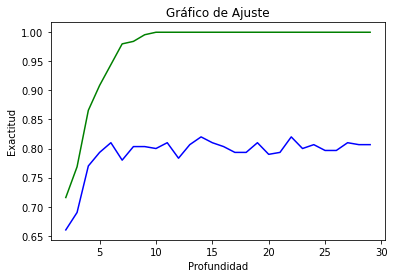

In [22]:
### Gráfico de Ajuste
plt.plot(max_depth,train_pred,color='g',label="Entrenamiento")
plt.plot(max_depth,test_pred,color='b',label="Test")
plt.ylabel('Exactitud')
plt.title('Gráfico de Ajuste')
plt.xlabel('Profundidad')
plt.show()

In [23]:
from sklearn.model_selection import validation_curve

In [26]:
train_acc,test_acc=validation_curve(estimator=DecisionTreeClassifier(),
X=X_train,y=y_train,param_name='max_depth',param_range=max_depth)

In [33]:
pd.DataFrame(train_acc)

,0,1,2,3,4
0,0.696429,0.712500,0.682143,0.700000,0.694643
1,0.832143,0.835714,0.812500,0.826786,0.830357
2,0.885714,0.914286,0.901786,0.880357,0.873214
3,0.928571,0.942857,0.939286,0.939286,0.941071
4,0.960714,0.969643,0.966071,0.958929,0.975000
5,0.991071,0.978571,0.987500,0.985714,0.991071
6,0.996429,0.989286,0.998214,0.994643,0.996429
7,0.998214,0.996429,1.000000,1.000000,0.998214
8,1.000000,0.996429,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
media_train=np.mean(train_acc,axis=1)
media_test=np.mean(test_acc,axis=1)

In [29]:
media_train

array([0.69714286, 0.8275    , 0.89107143, 0.93821429, 0.96607143,
       0.98678571, 0.995     , 0.99857143, 0.99928571, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [31]:
media_test

array([0.68714286, 0.80714286, 0.84      , 0.84857143, 0.81      ,
       0.80571429, 0.81428571, 0.81285714, 0.80714286, 0.81142857,
       0.79714286, 0.80285714, 0.80714286, 0.80142857, 0.82      ,
       0.80428571, 0.80571429, 0.82      , 0.8       , 0.82      ,
       0.80142857, 0.80857143, 0.81285714, 0.81142857, 0.80428571,
       0.81142857, 0.81285714, 0.79571429])

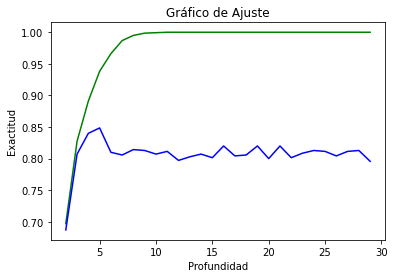

In [32]:
### Gráfico de Ajuste
plt.plot(max_depth,media_train,color='g',label="Entrenamiento")
plt.plot(max_depth,media_test,color='b',label="Test")
plt.ylabel('Exactitud')
plt.title('Gráfico de Ajuste')
plt.xlabel('Profundidad')
plt.show()

### Evitar SobreAjuste
* Recolectar más datos
* Utilizar metodos de Ensamblado (ej. Random Forest)
* Utilizar Validación Cruzada
* Optimizar los parámetros del modelo con GrifSearch

In [34]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [37]:
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1234)

In [38]:
kfold

StratifiedKFold(n_splits=10, random_state=1234, shuffle=True)

In [44]:
exactitud=[]
Arbol3=DecisionTreeClassifier(max_depth=5,criterion="entropy")
for k, (train,test) in enumerate(kfold.split(X_train,y_train)):
    Arbol3.fit(X_train[train],y_train[train])
    exactitud.append(Arbol3.score(X_train[test],y_train[test]))
    print("La Carpeta: {0}, Clase: {1} , Exactitud: {2:.3f}".\
        format(k+1,np.bincount(y_train[train]),Arbol3.score(X_train[test],y_train[test])))

La Carpeta: 1, Clase: [213 212 205] , Exactitud: 0.786
La Carpeta: 2, Clase: [213 212 205] , Exactitud: 0.886
La Carpeta: 3, Clase: [213 212 205] , Exactitud: 0.843
La Carpeta: 4, Clase: [214 212 204] , Exactitud: 0.800
La Carpeta: 5, Clase: [214 212 204] , Exactitud: 0.729
La Carpeta: 6, Clase: [214 212 204] , Exactitud: 0.800
La Carpeta: 7, Clase: [213 213 204] , Exactitud: 0.857
La Carpeta: 8, Clase: [213 213 204] , Exactitud: 0.829
La Carpeta: 9, Clase: [213 213 204] , Exactitud: 0.857
La Carpeta: 10, Clase: [213 213 204] , Exactitud: 0.843


In [45]:
np.mean(exactitud)

0.8228571428571427

In [46]:
np.std(exactitud)

0.04295227536677973

In [47]:
from sklearn.model_selection import cross_val_score

In [49]:
exactitud=cross_val_score(estimator=Arbol3,X=X_train,y=y_train,n_jobs=-1)

In [50]:
exactitud

array([0.8       , 0.76428571, 0.85      , 0.85714286, 0.85      ])

In [51]:
np.mean(exactitud)

0.8242857142857142

In [52]:
np.std(exactitud)

0.03630932864896809